In [1]:
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
import random
import matplotlib.pyplot as plt
from sklearn.tree import export_text
import seaborn as sns
random.seed(20)


In [2]:
df=pd.read_csv("covid_data.csv",header=0)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     585 non-null    int64  
 1   SEX                                     585 non-null    object 
 2   COVID KNOWLEDGE                         585 non-null    int64  
 3   PROXIMITIY TO COVID(JOB)                585 non-null    int64  
 4   CLOSE FAMILY MEMBERS WITH YOU           585 non-null    int64  
 5   FOOD AVAILABILITY                       585 non-null    int64  
 6   HOBBIES ENGAGEMENT                      585 non-null    int64  
 7   WORK ENGAGEMENT                         585 non-null    int64  
 8   PHYSICAL ACTIVITY (HORUS PER WEEK)      585 non-null    float64
 9   ALONE SCALE                             585 non-null    int64  
 10  ZONE OF STAY                            585 non-null    int64 

,AGE,SEX,COVID KNOWLEDGE,PROXIMITIY TO COVID(JOB),CLOSE FAMILY MEMBERS WITH YOU,FOOD AVAILABILITY,HOBBIES ENGAGEMENT,WORK ENGAGEMENT,PHYSICAL ACTIVITY (HORUS PER WEEK),ALONE SCALE,...,CHANGE IN QUALITY OF LIFE (SALARY),EARNING FAMILY MEMBERS (EXCLUDING YOU),ARE YOU AN EARNING MEMBER,FAMILY MEMBERS WITHOUT INCOME,ANY FAMILY MEMBERS SHOWING SYMPTOMS,COMORBIDITIES,HEALTH INSURANCE/FINANCIAL CAPABILITY,ANY PENDING SURGERIES/PROCEDURES,QUALITY OF AVAILABLE MEDICAL FACILITY,STRESS(Y)
0,45,F,3,4,1,3,3,3,2.0,4,...,0,1,1,1,0,1,1,0,2,9
1,42,F,3,4,1,4,1,5,0.0,5,...,0,2,1,2,0,1,1,0,5,31
2,45,F,3,4,0,4,3,5,1.0,3,...,0,1,1,2,0,1,1,0,4,19
3,20,F,3,0,0,3,3,3,2.0,5,...,0,1,0,1,0,0,1,0,3,24
4,31,F,4,3,1,4,3,3,10.0,3,...,1,1,0,2,0,1,1,0,3,17


In [7]:
#current problems: interpreting random forest and reading the weights from a decision tree seem difficult
#no library function available for the same 
linreg=LinearRegression()
X=df.drop(['STRESS(Y)'],axis=1)

y=df['STRESS(Y)']
for i in range(len(X)):
    if (X['SEX'][i]=='M'):
        X.at[i,'SEX']=0
    else:
        X.at[i,'SEX']=1

acc_linreg=cross_val_score(linreg,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_linreg)/y.mean())

-0.20610510144861674


In [8]:
linreg.fit(X,y)
theta=linreg.coef_
theta_int=linreg.intercept_
col_names=X.columns
feature_imps=pd.DataFrame(theta,index=col_names,columns=['importance'])
print("Basal stress value:",theta_int)
feature_imps.sort_values(by='importance',ascending=False).head(25)

Basal stress value: 27.154113381461492


,importance
CHANGE IN QUALITY OF LIFE (SALARY),2.397783
SEX,1.044799
ANY PENDING SURGERIES/PROCEDURES,0.720648
WORK ENGAGEMENT,0.713455
COMORBIDITIES,0.652519
EARNING FAMILY MEMBERS (EXCLUDING YOU),0.230073
FOOD AVAILABILITY,0.156775
PROXIMITIY TO COVID(JOB),0.109701
SCALE OF LIABILITIES,0.061301
FAMILY MEMBERS WITHOUT INCOME,0.047127


In [10]:
ridgeReg=Ridge()

acc_ridge_reg=cross_val_score(ridgeReg,X,y,scoring='neg_mean_absolute_error',cv=10)
print(np.mean(acc_ridge_reg)/y.mean())

-0.205955280523433


In [29]:
dt_cv=DecisionTreeRegressor(splitter='random')
clf_dt=GridSearchCV(dt_cv,param_grid={'random_state':list(range(10000))},n_jobs=-1,cv=5,verbose=1)
clf_dt.fit(X,y)
print (clf_dt.best_estimator_)


Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 3232 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 9632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 14032 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 19232 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 25232 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 32032 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 39632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 48032 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 50000 out of 50000 | elapsed:  5.1min finished


DecisionTreeRegressor(random_state=8280, splitter='random')


In [6]:
estimator=DecisionTreeRegressor(splitter='random',random_state=3458)
estimator.fit(X,y)
acc_linreg=cross_val_score(estimator,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_linreg)/y.mean())
file=open("dtr.txt",'w+')
tree_rules = export_text(estimator, feature_names=list(X.columns))
file.write(tree_rules)
file.close()

-0.26746087888610726


In [7]:
col_names=X.columns
feature_imps=pd.DataFrame(estimator.feature_importances_,index=col_names,columns=['importance'])
print("Decision Tree results")
feature_imps.sort_values(by='importance',ascending=False).head(25)

Decision Tree results


,importance
HOBBIES ENGAGEMENT,0.114689
ALONE SCALE,0.091789
AGE,0.084249
CHANGE IN QUALITY OF LIFE (SALARY),0.071011
QUALITY OF AVAILABLE MEDICAL FACILITY,0.058668
COVID KNOWLEDGE,0.053025
HEALTH INSURANCE/FINANCIAL CAPABILITY,0.048350
WORK ENGAGEMENT,0.047433
ARE YOU AN EARNING MEMBER,0.045994
FAMILY MEMBERS WITHOUT INCOME,0.045965


In [8]:
tree_rules = export_text(estimator, feature_names=list(X.columns))
tree_rules

'|--- HOBBIES ENGAGEMENT <= 3.76\n|   |--- ALONE SCALE <= 2.13\n|   |   |--- PRESENCE OF STABLE JOB <= 0.85\n|   |   |   |--- CHANGE IN QUALITY OF LIFE (SALARY) <= 0.09\n|   |   |   |   |--- ALONE SCALE <= 1.22\n|   |   |   |   |   |--- CLOSE FAMILY MEMBERS WITH YOU <= 0.04\n|   |   |   |   |   |   |--- FAMILY MEMBERS WITHOUT INCOME <= 2.21\n|   |   |   |   |   |   |   |--- value: [20.00]\n|   |   |   |   |   |   |--- FAMILY MEMBERS WITHOUT INCOME >  2.21\n|   |   |   |   |   |   |   |--- value: [19.00]\n|   |   |   |   |   |--- CLOSE FAMILY MEMBERS WITH YOU >  0.04\n|   |   |   |   |   |   |--- value: [18.00]\n|   |   |   |   |--- ALONE SCALE >  1.22\n|   |   |   |   |   |--- SEX <= 0.24\n|   |   |   |   |   |   |--- QUALITY OF AVAILABLE MEDICAL FACILITY <= 3.42\n|   |   |   |   |   |   |   |--- value: [15.00]\n|   |   |   |   |   |   |--- QUALITY OF AVAILABLE MEDICAL FACILITY >  3.42\n|   |   |   |   |   |   |   |--- value: [16.00]\n|   |   |   |   |   |--- SEX >  0.24\n|   |   |   |

In [12]:
tree.export_graphviz(estimator,feature_names=list(X.columns),filled=True,out_file="tree.dot")


In [72]:
rf_cv=RandomForestRegressor()
clf_rf=GridSearchCV(rf_cv,param_grid={'criterion':["mse","mae"],
                                     'max_features':["auto","sqrt","log2"]},n_jobs=-1,verbose=1)
clf_rf.fit(X,y)
print (clf_rf.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RandomForestRegressor(max_features='log2')


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.4s finished


In [79]:


np.random.seed(20)
rfr=RandomForestRegressor(n_estimators=1000,max_features='log2',n_jobs=-1)
acc_rfr=cross_val_score(rfr,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_rfr)/y.mean())


-0.19878258906800905


In [41]:
col_names=X.columns
feature_imps=pd.DataFrame(rfr.feature_importances_,index=col_names,columns=['importance'])
print("Random Forest results")
feature_imps.sort_values(by='importance',ascending=False).head(25)

Random Forest results


,importance
AGE,0.128579
ALONE SCALE,0.092678
HOBBIES ENGAGEMENT,0.075093
RESERVE CASH AVAILABILITY,0.074761
SCALE OF LIABILITIES,0.072356
PHYSICAL ACTIVITY (HORUS PER WEEK),0.072046
WORK ENGAGEMENT,0.053060
QUALITY OF AVAILABLE MEDICAL FACILITY,0.050828
CHANGE IN QUALITY OF LIFE (SALARY),0.043807
PROXIMITIY TO COVID(JOB),0.043170


In [59]:
np.random.seed(28)
rf_cv=RandomForestRegressor(n_estimators=20,max_features='log2')
clf_rf=GridSearchCV(rf_cv,param_grid={'min_samples_leaf':[i for i in range (3,15)],
                                      'min_samples_split':[i for i in range(2, 15)],
                                      'max_leaf_nodes':[5*i for i in range (4,15)]
                                },n_jobs=-1,verbose=1,cv=10)
clf_rf.fit(X,y)
print (clf_rf.best_estimator_)

Fitting 10 folds for each of 1716 candidates, totalling 17160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 4928 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 7128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9728 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 12728 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 16128 tasks      | elapsed:  2.5min


RandomForestRegressor(max_features='log2', max_leaf_nodes=70,
                      min_samples_leaf=3, min_samples_split=3, n_estimators=20)


[Parallel(n_jobs=-1)]: Done 17160 out of 17160 | elapsed:  2.6min finished


In [37]:
np.random.seed(20)
rf_cv=RandomForestRegressor(n_estimators=20)
clf_rf=GridSearchCV(rf_cv,param_grid={'min_samples_leaf':[i for i in range (3,11)],
                                      'min_samples_split':[i for i in range(2, 11)],
                                      'max_leaf_nodes':[5*i for i in range (4,10)]
                                },n_jobs=-1,verbose=1)
clf_rf.fit(X,y)
print (clf_rf.best_estimator_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   22.3s


RandomForestRegressor(max_leaf_nodes=25, min_samples_leaf=6,
                      min_samples_split=8, n_estimators=20)


[Parallel(n_jobs=-1)]: Done 2153 out of 2160 | elapsed:   28.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   28.1s finished


In [24]:
np.random.seed(20)
rfr=RandomForestRegressor(n_estimators=1000,max_features='log2',n_jobs=-1)
rfr.fit(X,y)
acc_rfr=cross_val_score(rfr,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_rfr)/y.mean())

-0.199223385395705


In [45]:
i=1
for dt in rfr.estimators_:
    tree.export_graphviz(dt,feature_names=list(X.columns),filled=True,out_file="tree"+str(i)+".dot")
    i=i+1
        

In [173]:
rfr1=RandomForestRegressor(n_estimators=20,max_features='log2',n_jobs=-1)
rfr1.fit(X,y)
acc_rfr1=cross_val_score(rfr1,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_rfr1)/y.mean())
col_names=X.columns
feature_imps=pd.DataFrame(rfr1.feature_importances_,index=col_names,columns=['importance'])
print("Random Forest results")
feature_imps.sort_values(by='importance',ascending=False).head(25)

-0.20403244602819906
Random Forest results


,importance
AGE,0.121091
ALONE SCALE,0.098524
PHYSICAL ACTIVITY (HORUS PER WEEK),0.083765
RESERVE CASH AVAILABILITY,0.083505
SCALE OF LIABILITIES,0.068333
HOBBIES ENGAGEMENT,0.066262
QUALITY OF AVAILABLE MEDICAL FACILITY,0.054814
WORK ENGAGEMENT,0.047192
CHANGE IN QUALITY OF LIFE (SALARY),0.044803
FAMILY MEMBERS WITHOUT INCOME,0.044272


In [177]:
rfr1.estimators_

[DecisionTreeRegressor(max_features='log2', random_state=224088285),
 DecisionTreeRegressor(max_features='log2', random_state=1531617604),
 DecisionTreeRegressor(max_features='log2', random_state=1292631653),
 DecisionTreeRegressor(max_features='log2', random_state=1668985153),
 DecisionTreeRegressor(max_features='log2', random_state=1914869560),
 DecisionTreeRegressor(max_features='log2', random_state=1336158748),
 DecisionTreeRegressor(max_features='log2', random_state=643247607),
 DecisionTreeRegressor(max_features='log2', random_state=583806498),
 DecisionTreeRegressor(max_features='log2', random_state=2115785164),
 DecisionTreeRegressor(max_features='log2', random_state=962866980),
 DecisionTreeRegressor(max_features='log2', random_state=415155757),
 DecisionTreeRegressor(max_features='log2', random_state=1729020910),
 DecisionTreeRegressor(max_features='log2', random_state=184239706),
 DecisionTreeRegressor(max_features='log2', random_state=1350061886),
 DecisionTreeRegressor(max

In [181]:
for i in range(20):
    file=open("dtr"+str(i+1)+".txt",'w+')
    tree_rules = export_text(rfr1.estimators_[i], feature_names=list(X.columns))
    file.write(tree_rules)
    file.close()

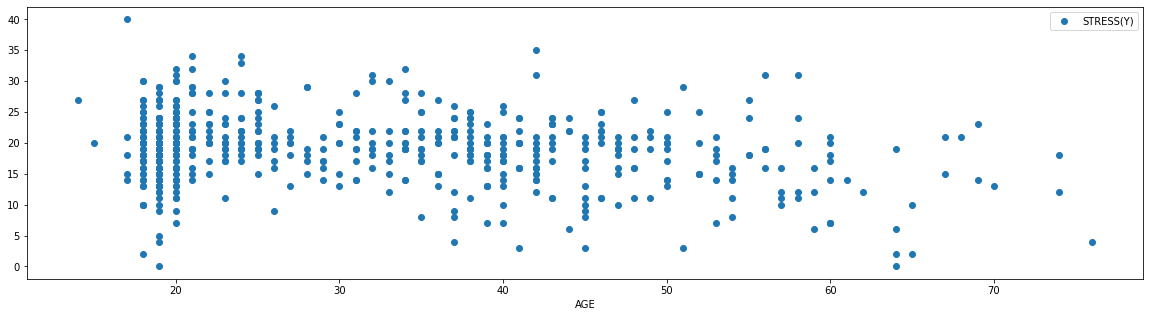

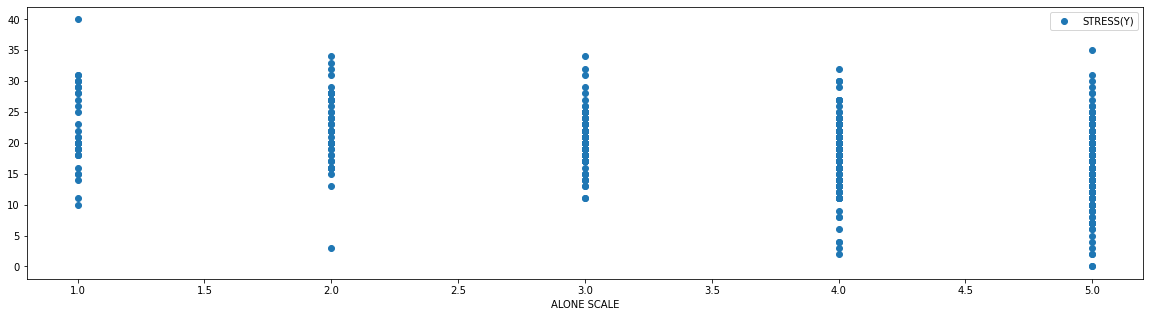

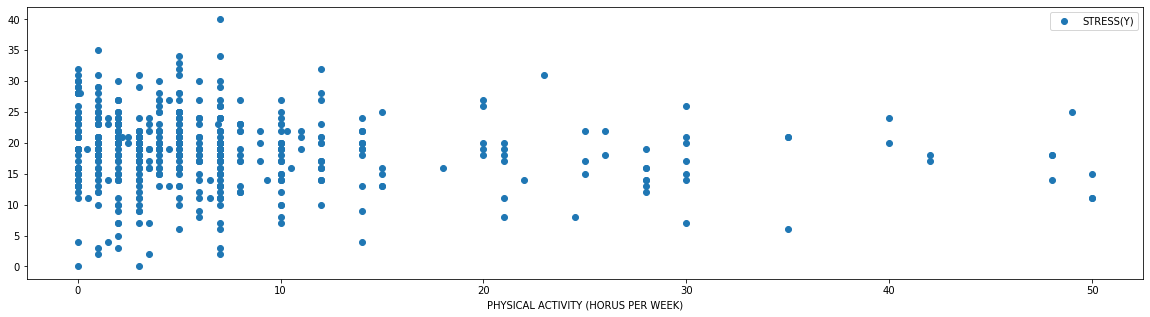

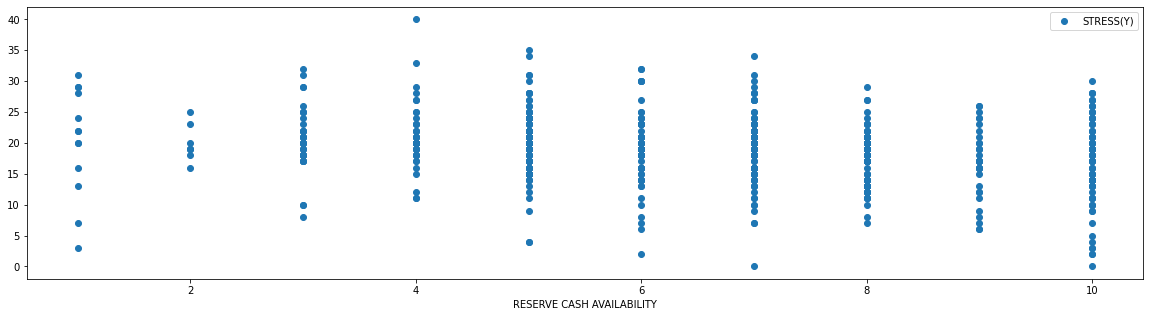

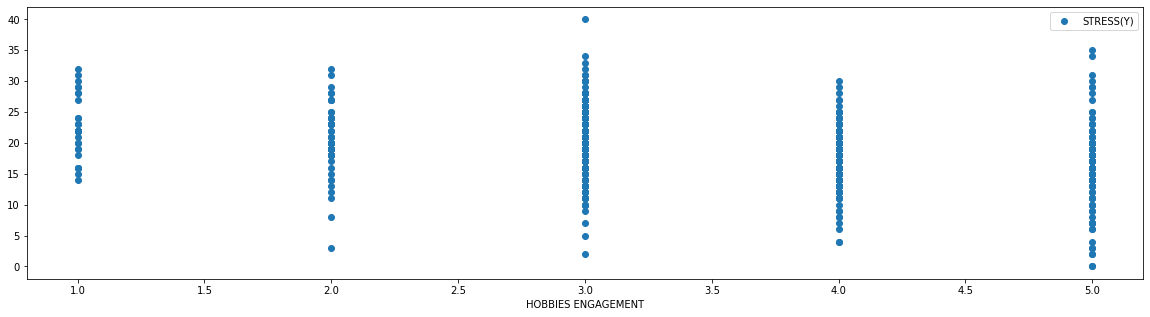

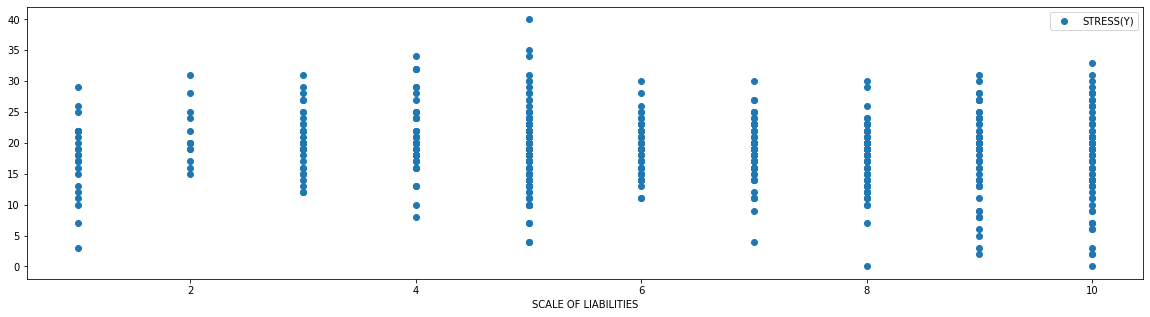

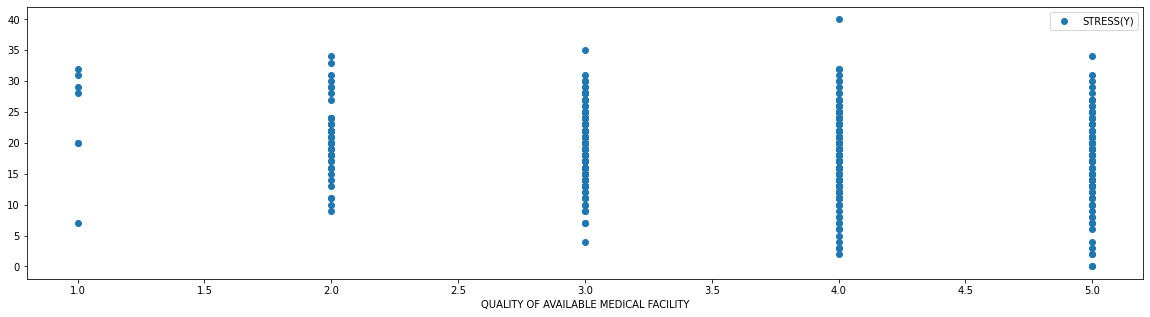

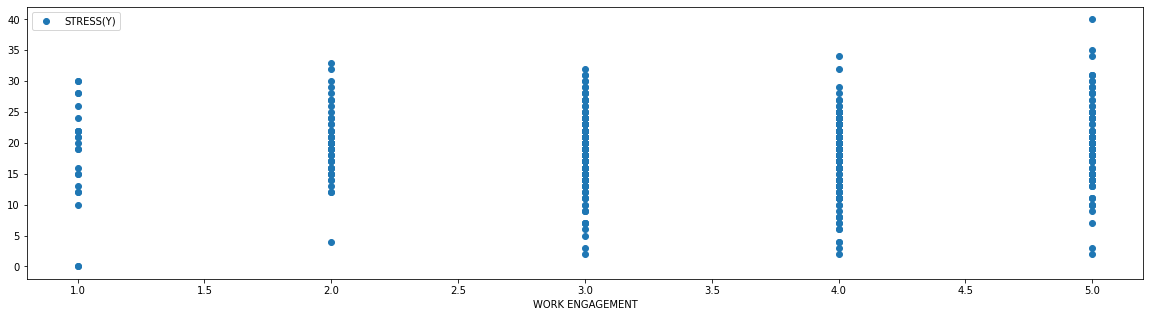

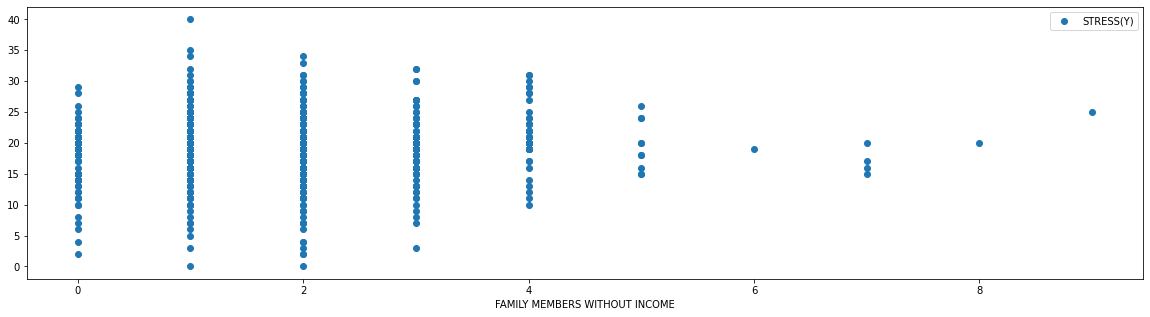

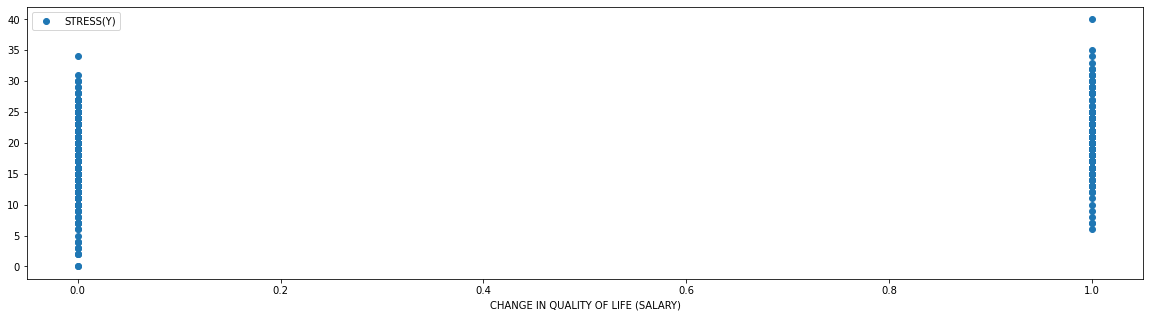

In [109]:
df.plot(x='AGE',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='ALONE SCALE',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='PHYSICAL ACTIVITY (HORUS PER WEEK)',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='RESERVE CASH AVAILABILITY',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='HOBBIES ENGAGEMENT',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='SCALE OF LIABILITIES',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='QUALITY OF AVAILABLE MEDICAL FACILITY',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='WORK ENGAGEMENT',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='FAMILY MEMBERS WITHOUT INCOME',y='STRESS(Y)',style='o',figsize=(20,5))
df.plot(x='CHANGE IN QUALITY OF LIFE (SALARY)',y='STRESS(Y)',style='o',figsize=(20,5))

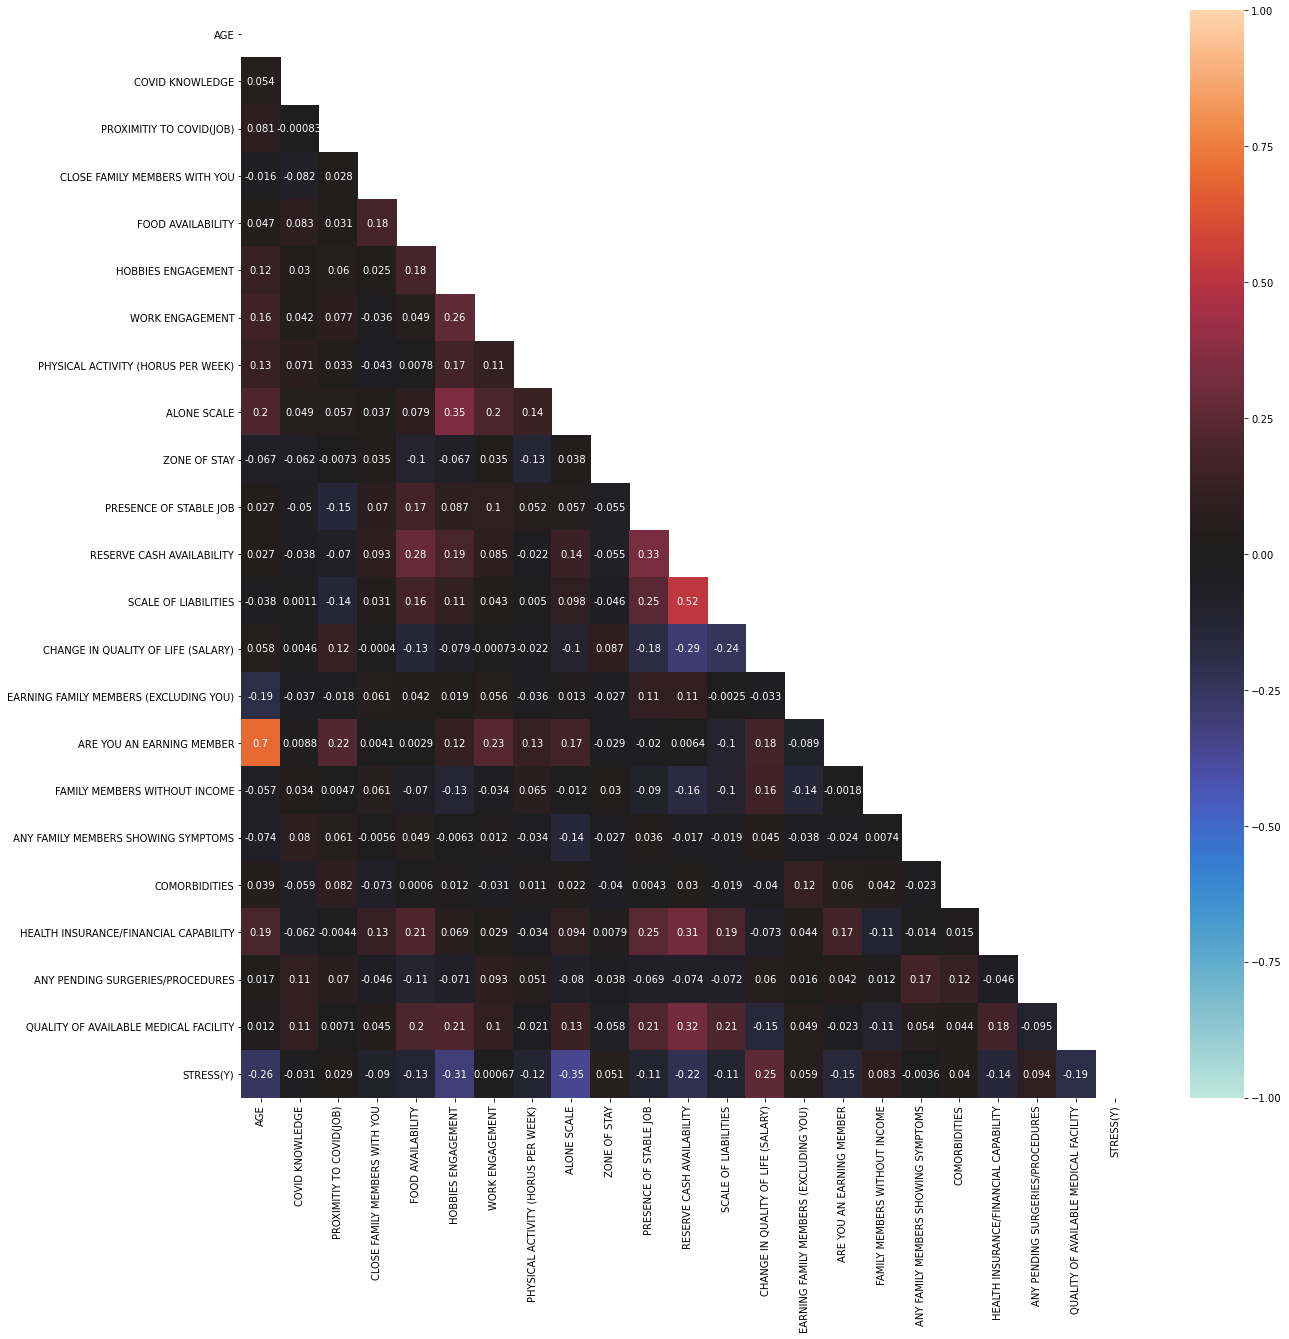

In [118]:
corr=np.triu(df.corr())


f,ax=plt.subplots(figsize=(20,20))

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,mask=corr)
plt.show()

In [85]:
rf_cv=ExtraTreesRegressor(n_estimators=200)
clf_rf=GridSearchCV(rf_cv,param_grid={'criterion':["mse","mae"],
                                     'max_features':["auto","sqrt","log2"]},n_jobs=-1,cv=10,verbose=1)
clf_rf.fit(X,y)
print (clf_rf.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   23.0s finished


ExtraTreesRegressor(max_features='sqrt', n_estimators=200)


In [86]:
rfr=ExtraTreesRegressor(n_estimators=400,max_features='log2',n_jobs=-1)
rfr.fit(X,y)
acc_rfr=cross_val_score(rfr,X,y,scoring='neg_mean_absolute_error',cv=10)
print (np.mean(acc_rfr)/y.mean())

-0.19994362972071703


In [87]:
col_names=X.columns
feature_imps=pd.DataFrame(rfr.feature_importances_,index=col_names,columns=['importance'])
print("Extra Trees Regressor results")
feature_imps.sort_values(by='importance',ascending=False).head(25)

Extra Trees Regressor results


,importance
ALONE SCALE,0.096023
AGE,0.077536
HOBBIES ENGAGEMENT,0.075869
RESERVE CASH AVAILABILITY,0.062900
QUALITY OF AVAILABLE MEDICAL FACILITY,0.059204
CHANGE IN QUALITY OF LIFE (SALARY),0.055331
SCALE OF LIABILITIES,0.055110
PHYSICAL ACTIVITY (HORUS PER WEEK),0.051569
WORK ENGAGEMENT,0.049791
FAMILY MEMBERS WITHOUT INCOME,0.044620


In [120]:
rfr.base_estimator_

DecisionTreeRegressor()

In [8]:
for i in range(len(y)):
    if (y[i]<25 and y[i]>15):
        y[i]=1
    elif (y[i]>=25):
        y[i]=2
    elif (y[i]<=15):
        y[i]=0

<ipython-input-8-2a21d0dd6dae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
<ipython-input-8-2a21d0dd6dae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=2
<ipython-input-8-2a21d0dd6dae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1


In [9]:
dt_cv=DecisionTreeClassifier(random_state=20)
clf_dt=GridSearchCV(dt_cv,param_grid={'criterion':["gini","entropy"],
                                  'class_weight':["None","balanced"],
                                  'random_state':[10,20,30,40,50]},n_jobs=-1,cv=10)
rf_cv=RandomForestClassifier(n_jobs=-1)
clf_rf=GridSearchCV(rf_cv,param_grid={
    'criterion':["gini","entropy"],
    'class_weight':["None","balanced"],
    'warm_start':["True","False"]
})
clf_rf.fit(X,y)
clf_dt.fit(X,y)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 330, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 581, in _validate_y_class_weight
    raise ValueError('Valid presets for class_weight include '
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit fail

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the result

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
C:\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the result

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=20),
             n_jobs=-1,
             param_grid={'class_weight': ['None', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'random_state': [10, 20, 30, 40, 50]})

In [10]:
print (clf_dt.best_estimator_)
print (clf_rf.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=40)
RandomForestClassifier(class_weight='balanced', criterion='entropy', n_jobs=-1,
                       warm_start='False')


In [11]:
dt=DecisionTreeClassifier(random_state=40,class_weight="balanced",criterion='entropy')
dt.fit(X,y)
lr=LogisticRegression(max_iter=10000)
lr.fit(X,y)
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1,criterion='entropy',n_estimators=200,warm_start=False)
rf.fit(X,y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200, n_jobs=-1)

In [12]:
acc_lr=cross_val_score(lr,X,y,scoring='accuracy',cv=10)
print (np.mean(acc_lr))
acc_dt=cross_val_score(dt,X,y,scoring='accuracy',cv=10)
print (np.mean(acc_dt))
acc_rf=cross_val_score(rf,X,y,scoring='accuracy',cv=10)
print (np.mean(acc_rf))

0.6581239041496202
0.5470485096434834
0.6631209818819404


In [13]:
col_names=X.columns
feature_imps=pd.DataFrame(dt.feature_importances_,index=col_names,columns=['importance'])
print("Decision Tree results")
feature_imps.sort_values(by='importance',ascending=False).head(25)

Decision Tree results


,importance
PHYSICAL ACTIVITY (HORUS PER WEEK),0.125737
ALONE SCALE,0.125465
AGE,0.101345
SCALE OF LIABILITIES,0.091081
FAMILY MEMBERS WITHOUT INCOME,0.071178
RESERVE CASH AVAILABILITY,0.068387
HOBBIES ENGAGEMENT,0.064358
WORK ENGAGEMENT,0.045961
QUALITY OF AVAILABLE MEDICAL FACILITY,0.043961
ZONE OF STAY,0.039934


In [14]:
feature_imps=pd.DataFrame(rf.feature_importances_,index=col_names,columns=['importance'])
print("Random Forest Results")
feature_imps.sort_values(by='importance',ascending=False).head(24)

Random Forest Results


,importance
AGE,0.109563
ALONE SCALE,0.104921
PHYSICAL ACTIVITY (HORUS PER WEEK),0.081115
SCALE OF LIABILITIES,0.073006
RESERVE CASH AVAILABILITY,0.069772
HOBBIES ENGAGEMENT,0.063753
FAMILY MEMBERS WITHOUT INCOME,0.055990
QUALITY OF AVAILABLE MEDICAL FACILITY,0.051661
WORK ENGAGEMENT,0.050429
PROXIMITIY TO COVID(JOB),0.046347


In [15]:
xgb_cv=XGBClassifier()
clf_xgb=GridSearchCV(xgb_cv,param_grid={'booster':["gbtree","gblinear","dart"],
                                  'sampling_method':["uniform","gradient_based"],
                                  'choices':['auto','exact','approx','hist','gpu_hist'],
                                    'updater':['grow_colmaker','grow_histmaker','grow_local_histmaker','grow_quantile_histmaker','prune',
                                              'sync','refresh','grow_gpu_hist'],
                                    'process_type':['default','update'],
                                    'grow_policy':['depthwise','lossguide']},n_jobs=-1,cv=10)
clf_xgb.fit(X,y)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields SEX